# Lab 6

Registration No.: 2348542

Name: Purusharth Malik

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#exploring the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#handling the missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#encoding the variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [7]:
X = df.drop('charges', axis=1).values
y = df.charges.values

## Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## Model Evaluation

In [9]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [10]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [11]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4181.194473753651

In [12]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

33596915.85136145

In [13]:
#RMSE
np.sqrt(mse)

5796.284659276273

In [14]:
#R2-score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7835929767120724

In [15]:
#adjusted R2-score
n, p = df.shape[0], df.shape[1]-1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7822903008758773

In [16]:
#RSS
pd.Series(y_test - y_pred).apply(lambda x: x**2).sum()

9003973448.16487

In [17]:
#explained variance score
1-np.var(y_test-y_pred)/np.var(y_test)

0.7839025861417649

## Feature Importance

In [18]:
lr.coef_

array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02, -1.85916916e+01,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

Clearly, the 5th coefficient is having the highest values.

In [19]:
print(f'The most important feature is: {df.drop("charges", axis=1).columns[4]}')

The most important feature is: smoker_yes


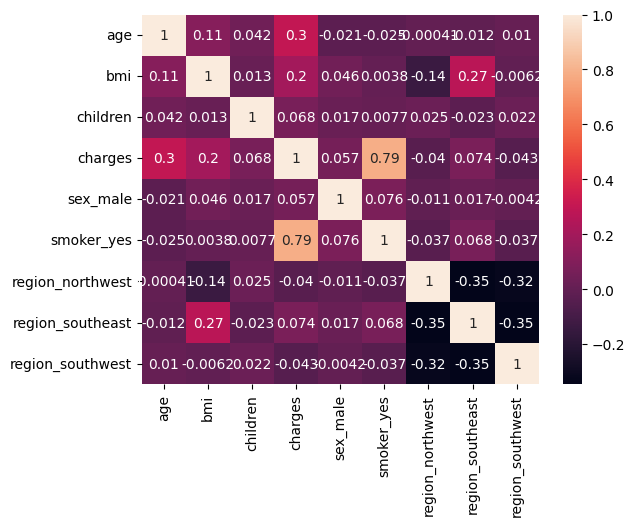

In [20]:
#checking whether the most important feature has been calculated correctly
sns.heatmap(df.corr(), annot=True)
plt.show()

From the heatmap, it is clear that `charges` is highly correlated with `smoker_yes` i.e. `smoker_yes` is the most important feature for the given data.

## Visualization

In [21]:
y_pred = lr.predict(X_test)

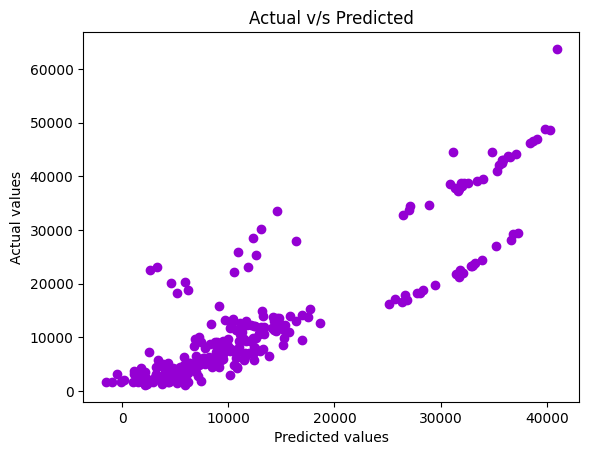

In [23]:
#plotting the scatter plot
plt.scatter(y_pred, y_test, color='#9400d3')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual v/s Predicted')
plt.show()

## Recommendation

As we saw above, in order to reduce the insurance costs, people should stop smoking.

## Extra Visualizations

In [26]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
